# Regression Trees

Demonstration of simple regression trees on the Diabetes dataset.
For the CARTs we use `sklearn.tree.DecisionTreeClassifier`.

## Import needed modules

In [ ]:
from sklearn.datasets import *
from IPython.display import Image, display_svg, SVG
from matplotlib import pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Install and import missing dependencies

In [ ]:
!pip install -q dtreeviz
from dtreeviz.trees import *

## Filter warnings
The dtreeviz packages reports some missing fonts, we disable the warnings for now.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Load the Diabetes dataset
Notice: Compared to the previous exercises (dimension reduction), we do not need to prepare the data further. Therefore, we do not need to apply any scaling.

In [ ]:
ds = load_diabetes()

X_train = ds.data
y_train = ds.target

feature_names = ds.feature_names
#class_names = ds.target_names

print(f"Len of the dataset: {len(X_train)}")
print(f"Features: {feature_names}")
#print(f"Classes: {class_names}")

Len of the dataset: 442
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Train our first Classification Tree

In [ ]:
# init the classifier
regr = tree.DecisionTreeRegressor(max_depth=2) 

# fit on the training data
%time regr.fit(X_train, y_train)

CPU times: user 3.2 ms, sys: 37 µs, total: 3.24 ms
Wall time: 11.1 ms


DecisionTreeRegressor(max_depth=2)

## Visualize the tree

### Using sklearn visualization

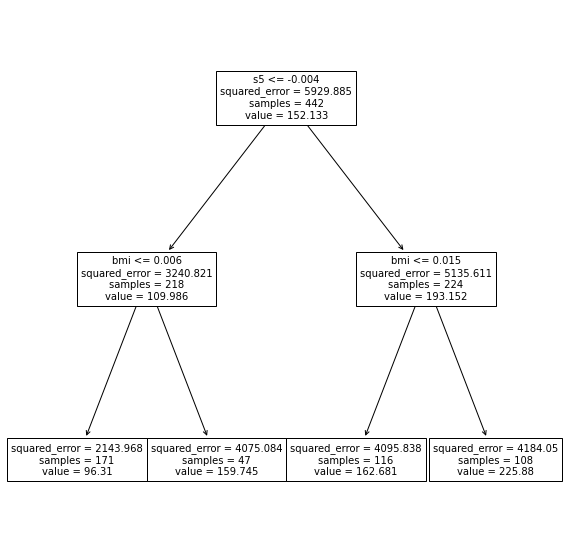

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(regr, feature_names=feature_names, filled=False);

### Using dtreeviz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


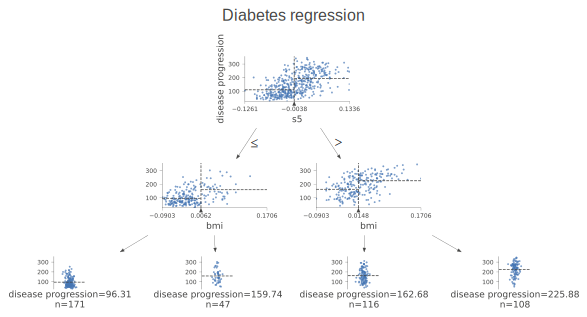

In [ ]:
viz = dtreeviz(regr, 
                X_train,
                y_train,
                target_name='disease progression',
                feature_names=feature_names, 
                title="Diabetes regression",
                fontname="Arial",
                title_fontsize=16,
                histtype= 'barstacked',
                ) 
viz

## Explore the effect of tree depth

In [ ]:
# define the various depths
max_depth = 6
depths = range(1, max_depth)

# train and store the regressors
regressors = []

for d in tqdm(depths):
  # init and train the classifier
  r = tree.DecisionTreeRegressor(max_depth=d) 
  r.fit(X_train, y_train)

  # create the visualization
  vis = dtreeviz(r, 
                X_train,
                y_train,
                target_name='disease progression',
                feature_names=feature_names, 
                title="Diabetes regression",
                fontname="Arial",
                title_fontsize=16,
                histtype= 'barstacked',
                ) 

  # append the depth, classifier visualization to the list
  regressors.append(
      {
          'depth': d,
          'regressor': r,
          'vis': vis
      }
  )

100%|██████████| 5/5 [00:21<00:00,  4.36s/it]


In [ ]:
def showPlot(regressorID):
  regressorID = regressorID - 1
  print(f"Tree depth = {regressors[regressorID]['depth']}")
  return regressors[regressorID]['vis']

In [ ]:
interact(showPlot,regressorID=(1,max_depth-1));

interactive(children=(IntSlider(value=3, description='regressorID', max=5, min=1), Output()), _dom_classes=('w…